In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.display.max_rows = 100

from matrix_factorization import KernelMF
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

# Reload imported code 
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import random
rand_seed = 15
np.random.seed(rand_seed)
random.seed(rand_seed)

## Prepare Data

In [2]:
ratings_train = np.load("ratings_train.npy") 
ratings_test = np.load("ratings_test.npy")

names_genres = np.load("namesngenre.npy", allow_pickle=True)
movie_names, movie_genres = zip(*names_genres)

n_users, n_items = ratings_train.shape
rows, cols = np.where(ratings_train > 0)
data = {
    "user_id": rows,
    "item_id": cols,
    "rating": ratings_train[rows, cols]
}

movie_data = pd.DataFrame(data)
movie_data.head()
movie_data.describe()

X = movie_data[["user_id", "item_id"]]
y = movie_data["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

,user_id,item_id,rating
0,0,0,4.0
1,0,44,5.0
2,0,58,3.0
3,0,86,4.0
4,0,104,5.0


,user_id,item_id,rating
count,31598.000000,31598.000000,31598.000000
mean,322.371289,1941.170137,3.524606
std,181.661067,1442.974775,1.032622
min,0.000000,0.000000,0.500000
25%,176.000000,680.000000,3.000000
50%,317.000000,1643.500000,3.500000
75%,473.000000,3119.000000,4.000000
max,609.000000,4979.000000,5.000000


## Kernel MF

### 1. RBF Kernel only

In [3]:
import time
start_time = time.time()
model_1 = KernelMF(
    n_factors=40,
    n_epochs=800,
    kernel="rbf",
    gamma=0.4,
    lr=0.01,
    reg=0.1,
    verbose=0
)

model_1.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Temps d'entraînement : {elapsed_time:.2f} secondes")

KernelMF(gamma=0.4, kernel='rbf', n_epochs=800, n_factors=40, reg=0.1,
         verbose=0)

Temps d'entraînement : 16.05 secondes


/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1302. 2158. 4664. ...   35. 2684. 1292.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


RMSE on test set: 0.9837


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Train RMSE')

Text(0.5, 1.0, 'Training Convergence for RBF kernel')

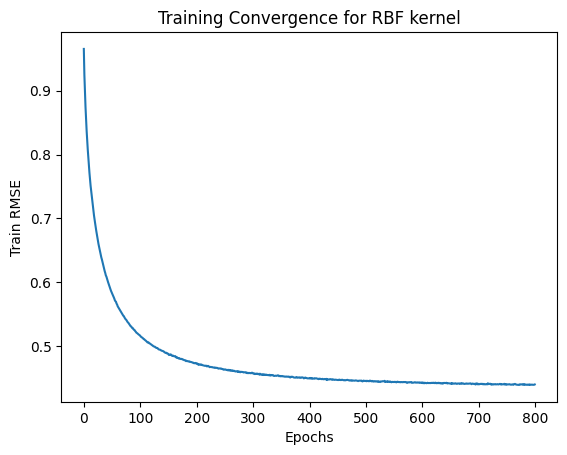

In [4]:
y_pred = model_1.predict(X_test)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {rmse:.4f}")

plt.plot(model_1.train_rmse)
plt.xlabel("Epochs")
plt.ylabel("Train RMSE")
plt.title("Training Convergence for RBF kernel")
plt.show()

### Sigmoid Kernel only

In [25]:
import time
start_time = time.time()
model_2 = KernelMF(
    n_factors=40,
    n_epochs=800,
    kernel="sigmoid",
    lr=0.01,
    reg=0.1,
    verbose=0
)

model_2.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Temps d'entraînement : {elapsed_time:.2f} secondes")

KernelMF(gamma=0.025, kernel='sigmoid', n_epochs=800, n_factors=40, reg=0.1,
         verbose=0)

Temps d'entraînement : 9.18 secondes


RMSE on test set: 1.0781


/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 744. 3046. 4336. ...  218.  153.  105.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Train RMSE')

Text(0.5, 1.0, 'Training Convergence for Sigmoid Kernel')

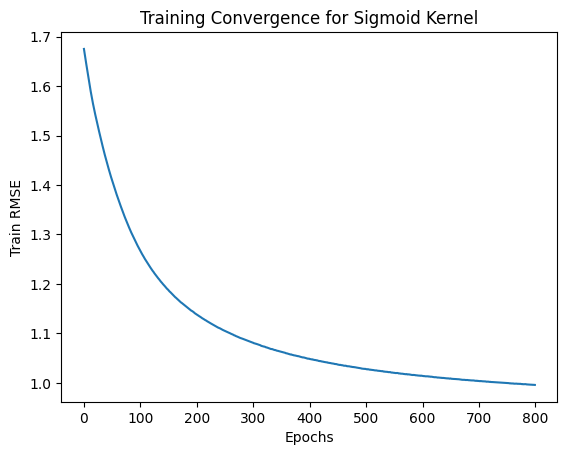

In [26]:
y_pred = model_2.predict(X_test)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {rmse:.4f}")

plt.plot(model_2.train_rmse)
plt.xlabel("Epochs")
plt.ylabel("Train RMSE")
plt.title("Training Convergence for Sigmoid Kernel")
plt.show()

### Linear Kernel only

In [7]:
start_time = time.time()
model_3 = KernelMF(
    n_factors=20,
    n_epochs=600,
    kernel="linear",
    lr=0.01,
    reg=0.5,
    verbose=0
)

model_3.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Temps d'entraînement : {elapsed_time:.2f} secondes")

KernelMF(gamma=0.05, n_epochs=600, n_factors=20, reg=0.5, verbose=0)

Temps d'entraînement : 4.70 secondes


RMSE on test set: 0.9005
Accuracy on test set: 0.2282


/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1708. 1516. 2947. ...  320. 2191.  685.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Train RMSE')

Text(0.5, 1.0, 'Training Convergence for Linear Kernel (i.e. Classic MF with bias)')

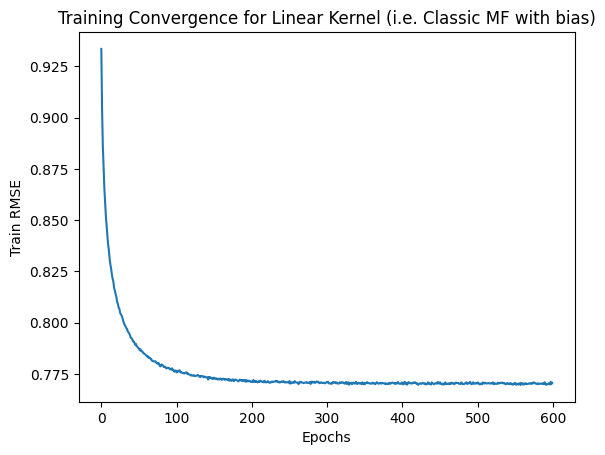

In [8]:
y_pred = model_3.predict(X_test)
y_pred = np.array(y_pred)  # Ensure y_pred is a numpy array
rmse = root_mean_squared_error(y_test, y_pred)
acc = np.mean(np.clip(np.round(y_pred * 2) / 2, 0, 5) == np.round(y_test * 2) / 2)
print(f"RMSE on test set: {rmse:.4f}")
print(f"Accuracy on test set: {acc:.4f}")

plt.plot(model_3.train_rmse)
plt.xlabel("Epochs")
plt.ylabel("Train RMSE")
plt.title("Training Convergence for Linear Kernel (i.e. Classic MF with bias)")
plt.show()

### Choice of $\gamma$

KernelMF(gamma=0.1, kernel='rbf', n_epochs=600, n_factors=30, reg=0.1,
         verbose=0)

/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1712. 1276. 4158. ...  616.  852.  670.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


gamma=0.10 | Test RMSE=1.0480 | Accuracy=0.4375


KernelMF(gamma=0.5, kernel='rbf', n_epochs=600, n_factors=30, reg=0.1,
         verbose=0)

/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 764. 2647. 4093. ...  309. 1085.  404.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


gamma=0.50 | Test RMSE=0.9640 | Accuracy=0.4449


KernelMF(gamma=1, kernel='rbf', n_epochs=600, n_factors=30, reg=0.1, verbose=0)

/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1404. 1145. 4156. ...  204. 1192.  883.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


gamma=1.00 | Test RMSE=0.9596 | Accuracy=0.4405


KernelMF(gamma=10, kernel='rbf', n_epochs=600, n_factors=30, reg=0.1, verbose=0)

/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1279. 1919. 4451. ...  229. 2513.  207.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


gamma=10.00 | Test RMSE=0.9955 | Accuracy=0.3951


KernelMF(gamma=100, kernel='rbf', n_epochs=600, n_factors=30, reg=0.1,
         verbose=0)

/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 553. 3447. 4283. ...  319.  857. 1222.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


gamma=100.00 | Test RMSE=2.8530 | Accuracy=0.0495


KernelMF(gamma=1000, kernel='rbf', n_epochs=600, n_factors=30, reg=0.1,
         verbose=0)

gamma=1000.00 | Test RMSE=3.1877 | Accuracy=0.0130


/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1527. 1228. 4127. ...   76. 2051. 1492.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)


<Figure size 900x500 with 0 Axes>

Text(0.5, 0, 'Gamma (log scale)')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'RBF Kernel: RMSE and Accuracy vs Gamma')

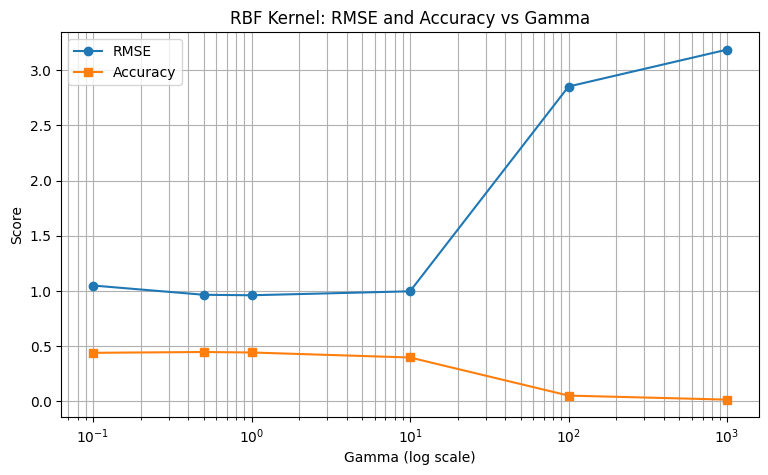

In [9]:
gamma_list = [0.1, 0.5, 1, 10, 100, 1000]
rmse_list = []
acc_list = []
for gamma in gamma_list:
    model_kernel = KernelMF(kernel="rbf", gamma=gamma, n_epochs=600, n_factors=30, reg=0.1, verbose=0)
    model_kernel.fit(X_train, y_train)
    y_pred = np.clip(np.array(model_kernel.predict(X_test)), y_test.min(), y_test.max())
    
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    rmse_list.append(rmse)
    
    acc = np.mean(np.round(y_pred) == np.round(y_test))
    acc_list.append(acc)
    
    print(f"gamma={gamma:<4.2f} | Test RMSE={rmse:.4f} | Accuracy={acc:.4f}")
plt.figure(figsize=(9,5))
plt.semilogx(gamma_list, rmse_list, marker='o', label='RMSE', color='tab:blue')
plt.semilogx(gamma_list, acc_list, marker='s', label='Accuracy', color='tab:orange')
plt.xlabel('Gamma (log scale)')
plt.ylabel('Score')
plt.title('RBF Kernel: RMSE and Accuracy vs Gamma')
plt.legend()
plt.grid(True, which='both')
plt.show()

## Multiple Kernel Matrix Factorization

In [10]:
from sklearn.metrics import root_mean_squared_error
from matrix_factorization import KernelMF 

def dirichlet_search_weights(P_list, y_val, n_samples=512, seed=42, init_mu=None):
    """
    P_list: list [pred_lin, pred_sig, pred_rbf]
    Return: (best_mu, best_rmse, historique_dataframe)
    """
    rng = np.random.default_rng(seed)
    p = len(P_list)
    if init_mu is None:
        init_mu = np.ones(p) / p
    def score(mu):
        pred = sum(w * P for w, P in zip(mu, P_list))
        return root_mean_squared_error(y_val, pred)
    hist = []
    mu0 = init_mu.copy()
    best_mu = mu0.copy()
    best_score = score(mu0)
    hist.append({"iter": 0, "rmse": best_score, **{f"mu{j+1}": best_mu[j] for j in range(p)}})
    for t in range(1, n_samples + 1):
        mu = rng.dirichlet(np.ones(p))
        sc = score(mu)
        if sc < best_score:
            best_mu, best_score = mu.copy(), sc
        hist.append({"iter": t, "rmse": sc, **{f"mu{j+1}": mu[j] for j in range(p)}})
    return best_mu, best_score, pd.DataFrame(hist)

In [11]:
common = dict(n_factors=40, n_epochs=300, lr=0.01, reg=0.1, verbose=0)
model_lin = KernelMF(kernel="linear", **common).fit(X_train, y_train)
model_sig = KernelMF(kernel="sigmoid", **common).fit(X_train, y_train)
model_rbf = KernelMF(kernel="rbf", gamma = 0.4,    **common).fit(X_train, y_train)

P_lin_val = np.array(model_lin.predict(X_test, bound_ratings=True))
P_sig_val = np.array(model_sig.predict(X_test, bound_ratings=True))
P_rbf_val = np.array(model_rbf.predict(X_test, bound_ratings=True))

rmse_lin = root_mean_squared_error(y_test, P_lin_val)
rmse_sig = root_mean_squared_error(y_test, P_sig_val)
rmse_rbf = root_mean_squared_error(y_test, P_rbf_val)
print(f"RMSE val — linear={rmse_lin:.4f} | sigmoid={rmse_sig:.4f} | rbf={rmse_rbf:.4f}")

RMSE val — linear=0.9052 | sigmoid=1.2111 | rbf=0.9614


/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1852. 1441. 3971. ...  109. 1362.   42.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)
/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 955. 1064. 1255. ... 1367. 2160.  122.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, "item_id"] = X["item_id"].map(self.item_id_map)
/Users/rayanedakhlaoui/Desktop/DSLab/assignment1-2025-regelegorilab/KMF/matrix_factorization/recommender_base.py:59: FutureWarning: Setting an item of i

Best mu: [0.9394 0.0302 0.0305]
Best RMSE (val): 0.905715


<Figure size 640x480 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Poids optimaux mu*')

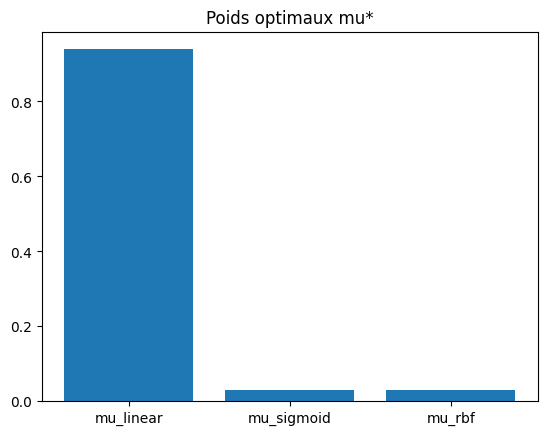

In [ ]:
P_list = [P_lin_val, P_sig_val, P_rbf_val]

best_mu, best_score, hist = dirichlet_search_weights(P_list, y_test, n_samples=512, seed=123, init_mu=np.ones(3)/3)
print("Best mu:", np.round(best_mu, 4))
print("Best RMSE (val):", round(best_score, 6))

# best mu barplot 
plt.figure()
plt.bar(["mu_linear","mu_sigmoid","mu_rbf"], best_mu)
plt.title("Poids optimaux mu*")
plt.show()

RMSE val — uniforme: 0.96995494563842
RMSE val — mu*     : 0.9057148361806444


<Figure size 640x480 with 0 Axes>

<BarContainer object of 2 artists>

Text(0, 0.5, 'RMSE(val)')

Text(0.5, 1.0, 'Combinaison uniforme vs optimisée')

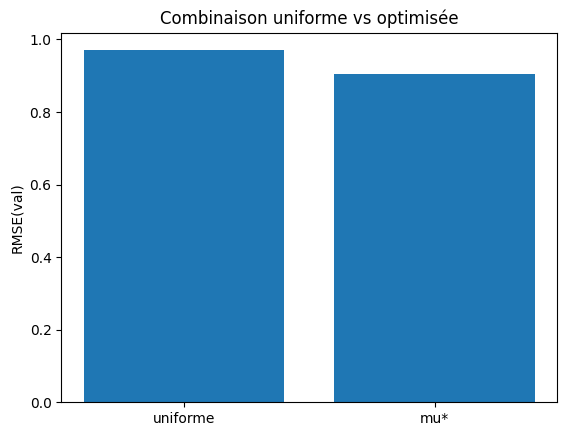

In [13]:
mu_uni = np.ones(3)/3
P_uni = mu_uni[0]*P_lin_val + mu_uni[1]*P_sig_val + mu_uni[2]*P_rbf_val
P_star = best_mu[0]*P_lin_val + best_mu[1]*P_sig_val + best_mu[2]*P_rbf_val

print("RMSE val — uniforme:", root_mean_squared_error(y_test, P_uni))
print("RMSE val — mu*     :", root_mean_squared_error(y_test, P_star))

plt.figure()
plt.bar(["uniforme","mu*"], [root_mean_squared_error(y_test,P_uni), root_mean_squared_error(y_test,P_star)])
plt.ylabel("RMSE(val)")
plt.title("Combinaison uniforme vs optimisée")
plt.show()

## Kernel based on film names/genres

In [14]:
movie_names  = names_genres[:, 0].astype(str)
movie_genres = names_genres[:, 1].astype(str)

# Matrice multi-hot (items × genres)
split_genres = [([] if (g is None or g.lower()=='nan') else g.split('|')) for g in movie_genres]
vocab = sorted({g for L in split_genres for g in L if g})
g2i   = {g:k for k,g in enumerate(vocab)}

n_items = len(movie_names)
G = np.zeros((n_items, len(vocab)), dtype=np.float32)
for i, L in enumerate(split_genres):
    for g in L:
        G[i, g2i[g]] = 1.0
        
print("G shape:", G.shape, "(items × genres); #genres =", len(vocab))

G shape: (4980, 20) (items × genres); #genres = 20


In [15]:
from numpy.linalg import norm
def cosine_kernel_items(X):
    norms = np.maximum(norm(X, axis=1), 1e-12)
    Xn = X / norms[:, None]
    return Xn @ Xn.T

K_genre = cosine_kernel_items(G)         # ou tanimoto_kernel_binary(G)
K_genre = K_genre / np.trace(K_genre)    # normalisation (optionnelle mais saine)
print("K_genre:", K_genre.shape, "min/max:", K_genre.min(), K_genre.max())

K_genre: (4980, 4980) min/max: 0.0 0.00020080323


In [ ]:
from collections import defaultdict
from sklearn.metrics import root_mean_squared_error as rmse

# user hist
user_hist = defaultdict(list)
for (u, i), r in zip(X_train[["user_id","item_id"]].to_numpy(), y_train.to_numpy()):
    u = int(u); i = int(i)
    if 0 <= i < K_genre.shape[0]:
        user_hist[u].append((i, float(r)))
        
global_mean = float(y_train.mean())
user_mean = pd.Series(y_train.values, index=X_train["user_id"]).groupby(level=0).mean()

def predict_genre_kernel_for_batch(X_batch, K, k=50, lam=5.0):
    """
    Voisinage item-based:
      - top-k voisins par similarité de genre
      - centrage par moyenne utilisateur (retire le biais)
      - shrinkage: (w^T (r-mean_u) + lam*0) / (sum w + lam)
    """
    preds = np.empty(len(X_batch), dtype=np.float32)
    for t, (u, i) in enumerate(X_batch[["user_id","item_id"]].to_numpy()):
        u = int(u); i = int(i)
        mu = float(user_mean.get(u, global_mean))  # moyenne utilisateur
        if (u not in user_hist) or (not 0 <= i < K.shape[0]) or len(user_hist[u]) == 0:
            preds[t] = mu
            continue
        
        js, rs = zip(*user_hist[u])
        js = np.array(js, dtype=int)
        rs = np.array(rs, dtype=np.float32)
        
        # similarités item-i vs items js
        ws = K[i, js]
        
        # top-k voisins
        if k is not None and len(ws) > k:
            idx = np.argpartition(ws, -k)[-k:]
            js, rs, ws = js[idx], rs[idx], ws[idx]
            
        # centrage autour de mu
        rs_centered = rs - mu
        wsum = float(ws.sum())
        num  = float(ws @ rs_centered)
        den  = wsum + lam  # shrinkage
        preds[t] = mu + (num / den if den > 1e-8 else 0.0)
    return preds

P_genre_test = predict_genre_kernel_for_batch(X_test, K_genre, k=50, lam=5.0)
print("RMSE genre-only (test):", rmse(y_test, P_genre_test))

RMSE genre-only (test): 0.9483274254101683


In [18]:
def coverage_ratio(K, X_train, X_eval):
    from collections import defaultdict
    uh = defaultdict(list)
    for (u,i), r in zip(X_train[["user_id","item_id"]].to_numpy(), y_train.to_numpy()):
        uh[int(u)].append(int(i))
    has_neighbor = 0
    for u,i in X_eval[["user_id","item_id"]].to_numpy():
        u=int(u); i=int(i)
        if (u in uh) and (0<=i<K.shape[0]) and len(uh[u])>0:
            js = uh[u]; ws = K[i, js]; 
            if np.sum(ws)>1e-8: has_neighbor += 1
    return has_neighbor/len(X_eval)

cov = coverage_ratio(K_genre, X_train, X_test)
print(f"Coverage voisinage utile: {cov:.1%}")

Coverage voisinage utile: 99.3%


In [19]:
P_list = [P_lin_val, P_sig_val, P_rbf_val, P_genre_test]

def tune_mu_dirichlet(P_list, y, n=1024, seed=123):
    rng = np.random.default_rng(seed)
    p = len(P_list)
    best_mu = np.ones(p)/p
    best = rmse(y, sum(w*P for w,P in zip(best_mu, P_list)))
    for _ in range(n):
        mu = rng.dirichlet(np.ones(p))
        sc = rmse(y, sum(w*P for w,P in zip(mu, P_list)))
        if sc < best: best_mu, best = mu, sc
    return best_mu, best

mu_star, rmse_star = tune_mu_dirichlet(P_list, y_test.to_numpy())
mu_uni = np.ones(len(P_list))/len(P_list)
rmse_uni = rmse(y_test, sum(w*P for w,P in zip(mu_uni, P_list)))
print("mu* =", np.round(mu_star,4), " RMSE(test)=", rmse_star, " | uniforme=", rmse_uni)

mu* = [5.713e-01 5.000e-04 3.520e-02 3.931e-01]  RMSE(test)= 0.8961325308768768  | uniforme= 0.93948897076359


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Poids optimaux mu*')

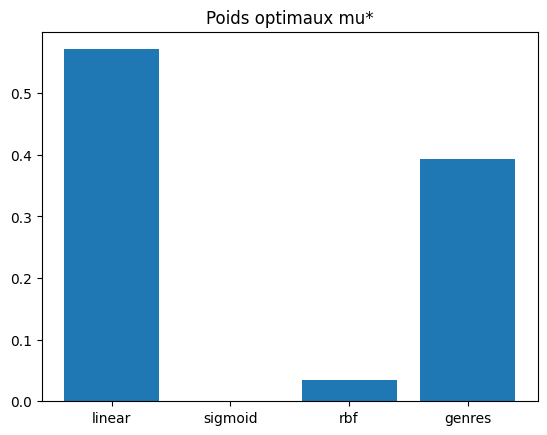

Gain absolu: 0.0434  | Gain relatif: 4.61%


In [30]:
labels = ["linear","sigmoid","rbf","genres"]
plt.bar(labels, [5.713e-01, 5.000e-04, 3.520e-02, 3.931e-01])
plt.title("Poids optimaux mu*"); plt.show()

impr = rmse_uni - rmse_star
print(f"Gain absolu: {impr:.4f}  | Gain relatif: {impr/rmse_uni*100:.2f}%")

In [29]:
from sklearn.metrics import mean_squared_error

rng = np.random.default_rng(123)
Y = y_test.to_numpy()
P_uni  = sum(w*P for w,P in zip(np.ones(4)/4, [P_lin_val, P_sig_val, P_rbf_val, P_genre_test]))
P_star = sum(w*P for w,P in zip([5.713e-01, 5.000e-04, 3.520e-02, 3.931e-01], [P_lin_val, P_sig_val, P_rbf_val, P_genre_test]))

def rmse(a,b): return mean_squared_error(a,b)**0.5

boots = []
for _ in range(1000):
    idx = rng.integers(0, len(Y), len(Y))
    boots.append(rmse(Y[idx], P_uni[idx]) - rmse(Y[idx], P_star[idx]))
boots = np.array(boots)
print("Gain bootstrap (ΔRMSE) median:", np.median(boots))
print("IC95% approx:", np.percentile(boots,[2.5,97.5]))

Gain bootstrap (ΔRMSE) median: 0.04322013588043161
IC95% approx: [0.03725355 0.04849725]
